# EDA with KBO Team Stats

### Q. Is there significant difference between stats of winning team and losing team?

### Let's start with analyzing their stats of batting, pitching and fielding.

### Data Source

KBO (Korea Baseball Organization, https://www.koreabaseball.com/) offers   

the stats of the league by team from 2001 to now.

There are hitting, pitching, running and fielding cateogries.




![KBO Homepage](./image/ScreenShot_KBO.jpg)


### Data Collection

We can scrap the data from web site with Python tools such as selenium, beautiful soap, and so on.  

I grabbed stats data for last 12 years (from 2010 to 2021)

### Let's play with the data

In [1]:
# import libraries

import pandas as pda

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-colorblind')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# read data to dataframe
df = pd.read_csv('./data/kbo_data_2022.csv')

In [6]:
# check the data
df.head()

,WIN,POST,YEAR,TEAM,AVG,G,PA,AB,R,H,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,N,N,2010,넥센,0.262,133,5139,4452,570,1165,...,9,160,68,29.8,191,135,56,70.7,56,5
1,N,Y,2010,두산,0.281,133,5252,4538,731,1276,...,8,119,44,27.0,189,128,61,67.7,56,12
2,N,Y,2010,롯데,0.288,133,5261,4673,773,1345,...,6,131,62,32.1,175,124,51,70.9,62,7
3,N,Y,2010,삼성,0.272,133,5287,4436,681,1207,...,6,134,65,32.7,213,158,55,74.2,54,8
4,N,N,2010,한화,0.244,133,5009,4321,543,1053,...,7,151,58,27.8,191,121,70,63.4,56,11


In [7]:
# chceck the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WIN     112 non-null    object 
 1   POST    112 non-null    object 
 2   YEAR    112 non-null    int64  
 3   TEAM    112 non-null    object 
 4   AVG     112 non-null    float64
 5   G       112 non-null    int64  
 6   PA      112 non-null    int64  
 7   AB      112 non-null    int64  
 8   R       112 non-null    int64  
 9   H       112 non-null    int64  
 10  2B      112 non-null    int64  
 11  3B      112 non-null    int64  
 12  HR      112 non-null    int64  
 13  TB      112 non-null    int64  
 14  RBI     112 non-null    int64  
 15  SAC     112 non-null    int64  
 16  SF      112 non-null    int64  
 17  BB      112 non-null    int64  
 18  IBB     112 non-null    int64  
 19  HBP     112 non-null    int64  
 20  SO      112 non-null    int64  
 21  GDP     112 non-null    int64  
 22  SL

In [8]:
# check the variables on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,112.0,2015.776786,3.405639,2010.000,2013.00000,2016.0000,2019.000,2021.000
AVG,112.0,0.274509,0.015821,0.237,0.26175,0.2755,0.288,0.309
G,112.0,139.071429,6.570085,128.000,133.00000,144.0000,144.000,144.000
PA,112.0,5450.223214,298.276693,4866.000,5150.25000,5540.5000,5697.500,5870.000
AB,112.0,4759.687500,288.165025,4271.000,4436.75000,4878.0000,4995.250,5176.000
...,...,...,...,...,...,...,...,...
SB,112.0,107.598214,29.311763,47.000,88.00000,105.0000,121.750,204.000
CS,112.0,48.214286,11.938603,23.000,39.00000,47.0000,56.000,83.000
SB%,112.0,68.690179,5.151820,55.800,65.87500,69.2000,71.875,80.700
OOB,112.0,52.526786,7.904794,33.000,47.75000,53.0000,58.000,72.000


In [9]:
# change target variables (WIN, POST) to number : Y => 1, N => 0
df['WIN'] = df['WIN'].map(lambda x:0 if x == "N" else 1)
df['POST'] = df['POST'].map(lambda x:0 if x == "N" else 1)

#### Start with basic stats with ratio values(average, ops, era, whip, ...)

* Baseball is a game of numbers.  There are lots of basic stats such as hits(H), runs(R), homeruns(HR),   
  earned runs(ER), .... But these numbers could be increased by number of games.   
  But some stats like batting averages(AVG), earned runs averages(ERA), ... are ratio values.  
  They are less affected by number of games.


#### Let's see correlation with win and stats

In [11]:
# check the correlation
# champion vs candidate features
win_corr = df[['WIN', 'AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']].corr()

In [12]:
win_corr

,WIN,AVG,OPS,RISP,PH-BA,ERA,WHIP,FPCT
WIN,1.000000,0.260065,0.229101,0.289963,-0.028839,-0.293579,-0.309534,0.291994
AVG,0.260065,1.000000,0.914071,0.817299,0.468646,0.280207,0.135835,0.045307
OPS,0.229101,0.914071,1.000000,0.760380,0.470387,0.295351,0.156807,0.013369
RISP,0.289963,0.817299,0.760380,1.000000,0.409917,0.130919,-0.024208,0.102908
PH-BA,-0.028839,0.468646,0.470387,0.409917,1.000000,0.243154,0.207866,-0.126618
ERA,-0.293579,0.280207,0.295351,0.130919,0.243154,1.000000,0.917936,-0.413566
WHIP,-0.309534,0.135835,0.156807,-0.024208,0.207866,0.917936,1.000000,-0.430676
FPCT,0.291994,0.045307,0.013369,0.102908,-0.126618,-0.413566,-0.430676,1.000000


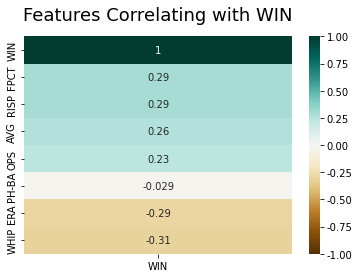

In [13]:
# Let's see the Correaltion by chart chart
heatmap = sns.heatmap(win_corr[['WIN']].sort_values(by='WIN', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Features Correlating with WIN', 
                  fontdict={'fontsize':18}, 
                  pad=16);

**WHIP**(Walks and Hits per Inning Pitched), **ERA**(Earned Runs Average), **FPCT**(Fielding PerCenTage), **RISP**(average on 
Runner In Scoring Position), **AVG**(batting AVeraGe) are relatively higher corellated with the winning of a season.      


*But the data size (only 12 wins) is not enough to find some solid relationships for the winning.*


#### Let's check about advanced to POST SEASON

In [14]:
post_corr = df[['POST', 'AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']].corr()

In [15]:
post_corr

,POST,AVG,OPS,RISP,PH-BA,ERA,WHIP,FPCT
POST,1.000000,0.370811,0.399492,0.453826,0.137420,-0.493536,-0.516892,0.317056
AVG,0.370811,1.000000,0.914071,0.817299,0.468646,0.280207,0.135835,0.045307
OPS,0.399492,0.914071,1.000000,0.760380,0.470387,0.295351,0.156807,0.013369
RISP,0.453826,0.817299,0.760380,1.000000,0.409917,0.130919,-0.024208,0.102908
PH-BA,0.137420,0.468646,0.470387,0.409917,1.000000,0.243154,0.207866,-0.126618
ERA,-0.493536,0.280207,0.295351,0.130919,0.243154,1.000000,0.917936,-0.413566
WHIP,-0.516892,0.135835,0.156807,-0.024208,0.207866,0.917936,1.000000,-0.430676
FPCT,0.317056,0.045307,0.013369,0.102908,-0.126618,-0.413566,-0.430676,1.000000


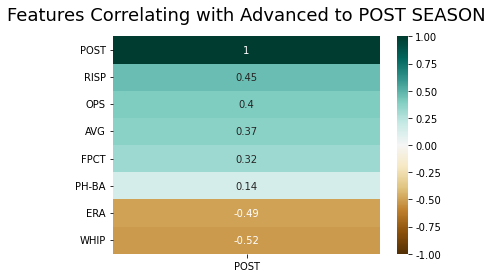

In [16]:
# Let's see the Corr with chart
heatmap = sns.heatmap(post_corr[['POST']].sort_values(by='POST', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Features Correlating with Advanced to POST SEASON', 
                  fontdict={'fontsize':18}, 
                  pad=16);

**We can get much clear correlations stats and advancing post season**  
**ERA**(Earned Runs Average), **WHIP**(Walks and Hits per Inning Pitched),  **RISP**(average on 
Runner In Scoring Position), **OPS** (On-base Plus Slugging), **AVG**(batting AVeraGe) are important stats for Post Season.     


### Let's see all about batting stats

In [17]:
# Check more batting stats
batt_corr = df[['WIN', 'AVG', 'OPS', 'RISP', 'H', 'HR', '2B', 'R', 'RBI', 'TB', 'SAC', 'GDP', 'SO']].corr()

In [18]:
batt_corr

,WIN,AVG,OPS,RISP,H,HR,2B,R,RBI,TB,SAC,GDP,SO
WIN,1.000000,0.260065,0.229101,0.289963,0.163399,0.070131,0.131832,0.264998,0.253110,0.136816,0.024621,-0.083833,-0.245193
AVG,0.260065,1.000000,0.914071,0.817299,0.837361,0.594873,0.736107,0.835913,0.835398,0.809061,-0.182027,0.246355,-0.116132
OPS,0.229101,0.914071,1.000000,0.760380,0.781427,0.817971,0.735808,0.903888,0.904515,0.878978,-0.188941,0.144780,0.033334
RISP,0.289963,0.817299,0.760380,1.000000,0.691519,0.514231,0.572062,0.773522,0.774058,0.677048,-0.154989,0.172395,-0.149631
H,0.163399,0.837361,0.781427,0.691519,1.000000,0.696252,0.832327,0.906144,0.909020,0.942620,-0.437771,0.427113,0.277918
HR,0.070131,0.594873,0.817971,0.514231,0.696252,1.000000,0.603705,0.809377,0.817398,0.887615,-0.277881,0.109931,0.389632
2B,0.131832,0.736107,0.735808,0.572062,0.832327,0.603705,1.000000,0.797010,0.796830,0.834460,-0.447159,0.310265,0.289951
R,0.264998,0.835913,0.903888,0.773522,0.906144,0.809377,0.797010,1.000000,0.997645,0.944880,-0.365677,0.265398,0.216495
RBI,0.253110,0.835398,0.904515,0.774058,0.909020,0.817398,0.796830,0.997645,1.000000,0.949446,-0.379270,0.272810,0.218912
TB,0.136816,0.809061,0.878978,0.677048,0.942620,0.887615,0.834460,0.944880,0.949446,1.000000,-0.411448,0.299657,0.342250


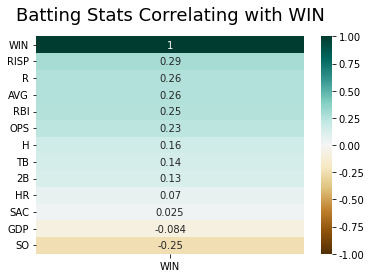

In [19]:
# Let's see the Corr with chart
heatmap = sns.heatmap(batt_corr[['WIN']].sort_values(by='WIN', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Batting Stats Correlating with WIN', 
                  fontdict={'fontsize':18}, 
                  pad=16);

**R**(Runs), **RBI**(Runs Batted In), **SO**(Strike Out) are more correlated with the win.

In [20]:
# Check more batting stats with POST SEASON
post_batt_corr = df[['POST', 'AVG', 'OPS', 'RISP', 'H', 'HR', '2B', 'R', 'RBI', 'TB', 'SAC', 'GDP', 'SO']].corr()

In [21]:
post_batt_corr

,POST,AVG,OPS,RISP,H,HR,2B,R,RBI,TB,SAC,GDP,SO
POST,1.000000,0.370811,0.399492,0.453826,0.262305,0.259127,0.232259,0.413677,0.405197,0.292338,-0.038192,-0.076115,-0.226940
AVG,0.370811,1.000000,0.914071,0.817299,0.837361,0.594873,0.736107,0.835913,0.835398,0.809061,-0.182027,0.246355,-0.116132
OPS,0.399492,0.914071,1.000000,0.760380,0.781427,0.817971,0.735808,0.903888,0.904515,0.878978,-0.188941,0.144780,0.033334
RISP,0.453826,0.817299,0.760380,1.000000,0.691519,0.514231,0.572062,0.773522,0.774058,0.677048,-0.154989,0.172395,-0.149631
H,0.262305,0.837361,0.781427,0.691519,1.000000,0.696252,0.832327,0.906144,0.909020,0.942620,-0.437771,0.427113,0.277918
HR,0.259127,0.594873,0.817971,0.514231,0.696252,1.000000,0.603705,0.809377,0.817398,0.887615,-0.277881,0.109931,0.389632
2B,0.232259,0.736107,0.735808,0.572062,0.832327,0.603705,1.000000,0.797010,0.796830,0.834460,-0.447159,0.310265,0.289951
R,0.413677,0.835913,0.903888,0.773522,0.906144,0.809377,0.797010,1.000000,0.997645,0.944880,-0.365677,0.265398,0.216495
RBI,0.405197,0.835398,0.904515,0.774058,0.909020,0.817398,0.796830,0.997645,1.000000,0.949446,-0.379270,0.272810,0.218912
TB,0.292338,0.809061,0.878978,0.677048,0.942620,0.887615,0.834460,0.944880,0.949446,1.000000,-0.411448,0.299657,0.342250


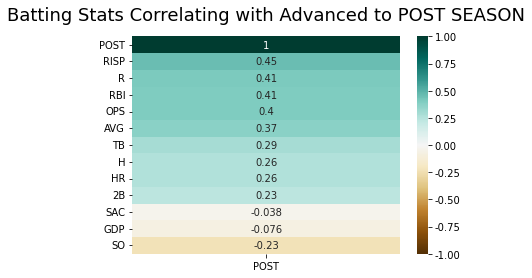

In [22]:
# Let's see the Corr with chart
heatmap = sns.heatmap(post_batt_corr[['POST']].sort_values(by='POST', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Batting Stats Correlating with Advanced to POST SEASON', 
                  fontdict={'fontsize':18}, 
                  pad=16);

**RISP**, **R**, **RBI**, **OPS** have more correation values with POST season